In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:\\Users\\arjun\\Desktop\\allprices\\crypto-markets.csv", parse_dates=["date"], index_col="date")
df.shape

(942297, 12)

In [3]:
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [5]:
df = df[df.slug == "litecoin"][['close']]

In [6]:
df['index']=df.index
df

,close,index
date,,
2013-04-28,4.35,2013-04-28
2013-04-29,4.38,2013-04-29
2013-04-30,4.30,2013-04-30
2013-05-01,3.80,2013-05-01
2013-05-02,3.37,2013-05-02
2013-05-03,3.04,2013-05-03
2013-05-04,3.48,2013-05-04
2013-05-05,3.59,2013-05-05
2013-05-06,3.37,2013-05-06


C:\Python\Python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.9, 'Down-sampled to 10-day periods')

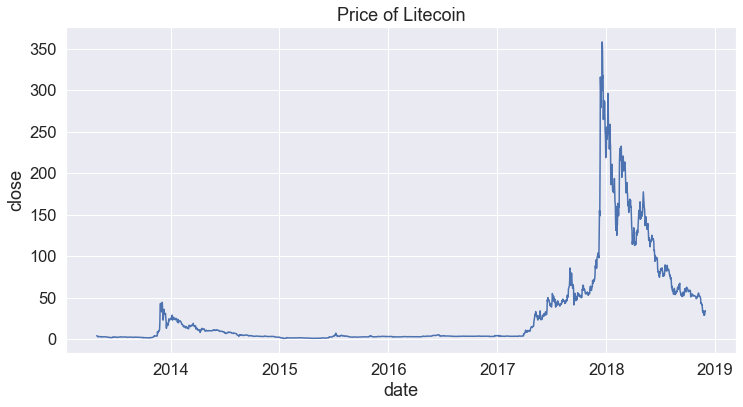

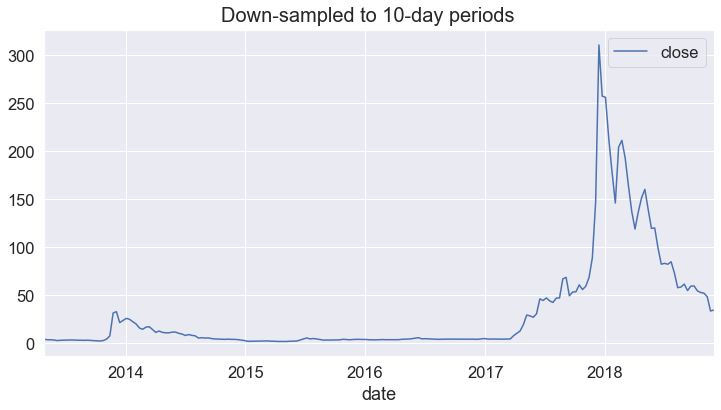

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="close", data=df).set_title("Price of Litecoin")
df.resample('10D').mean().plot(figsize=(12,6))
plt.figtext(.5,0.9,"Down-sampled to 10-day periods", fontsize=20, ha='center')

In [14]:
X=df.iloc[:,1]

In [19]:
X=np.array(X)

In [23]:
y=df.iloc[:,0]

In [25]:
y=np.array(y)


In [30]:
X_train=X[:1900]
y_train=y[:1900]
x_test=X[1900:]
y_test=y[1900:]

In [31]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
print(model.summary())

model.compile(optimizer='adam', loss='mean_squared_error')

IndexError: tuple index out of range